# 라이브러리

In [14]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/Online Lectures/Metacode_딥러닝라이브스터디8기/pj_신용카드이상탐지")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random_st = 42
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import pickle
import seaborn as sns
from pylab import rcParams

# 데이터 로드

In [3]:
df = pd.read_csv("creditcard_메타코드.csv")
display(df.shape, df.head(2))

(284807, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


# 전처리

# 컬럼 정리

In [4]:
#time 제외 전 중복값
df.duplicated(keep='first').sum()

# Time 데이터는 거래순서이므로 삭제
df.drop(columns = "Time", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 분리

In [5]:
#data 분리
train, test = train_test_split(df, test_size=0.2, random_state=random_st, stratify = df['Class'])
print(train.shape, test.shape)

x_train = train.drop('Class', axis=1)
y_train = train['Class']
x_test = test.drop('Class', axis=1)
y_test = test['Class']

print(x_train.shape, y_train.shape)

(227845, 30) (56962, 30)
(227845, 29) (227845,)


## 스케일링

In [6]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()

x_train = rbscaler.fit_transform(x_train)
x_test = rbscaler.transform(x_test)

## SMOTE

In [7]:
smote = SMOTE(random_state=random_st)
x_train_sm,y_train_sm= smote.fit_resample(x_train,y_train)
print('Before SMOTE : ', x_train.shape, y_train.shape)
print('After SMOTE  : ', x_train_sm.shape, y_train_sm.shape)
print("After SMOTE : label '1': {}, label '0': {}".format(sum(y_train_sm==1),sum(y_train_sm==0)))

Before SMOTE :  (227845, 29) (227845,)
After SMOTE  :  (454902, 29) (454902,)
After SMOTE : label '1': 227451, label '0': 227451


# 모델링

Parameter 설명
- class_weight 파라미터를 설정하여 클래스 가중치 지정 가능
- n_estimators = 트리의 개수, 높을수록 정확도가 높아지나 시간이 오래걸림
- num_leaves : 전체 tree의 leave 수 개수를 높이면 정확도가 높아지지만 과적합 영향도 커짐

Parameter tuning
* boost_from_average 파라미터를 False로 변경(레이블 값이 불균형한 경우 사용한다 함)
  * 결과 : recall 증가

* estimators 100->1000->1500
 * 1500에서 recall 하락
 * SMOTE : precision에서 큰 향상(0.2~0.8)



In [8]:
def get_score(y_test, y_pred, pred_proba):
    print('matrix \n', confusion_matrix(y_test, y_pred))
    print('Recall :', recall_score(y_test, y_pred))
    print('AUC    :', roc_auc_score(y_test, pred_proba))

In [16]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier(
   # model parameter
   n_estimators = 1000,
   num_leaves = 256,
   learning_rate = 0.01,
   boost_from_average = False,
   objective = "binary",
   random_state=42
)

## SMOTE 데이터셋

In [17]:
#LightGBM with SMOTE
model_lgbm.fit(x_train_sm, y_train_sm, eval_metric='aucpr')
y_pred_lgbm_sm = model_lgbm.predict(x_test)

print(classification_report(y_test, y_pred_lgbm_sm))
pred_proba_lgbm_sm = model_lgbm.predict_proba(x_test)[:,1]
get_score(y_test, y_pred_lgbm_sm, pred_proba_lgbm_sm)

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.203890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.88      0.87        98

    accuracy                           1.00     56962
   macro avg       0.93      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

matrix 
 [[56850    14]
 [   12    86]]
Recall : 0.8775510204081632
AUC    : 0.9748373850102787


## Origin 데이터셋

In [18]:
#LightGBM with original data
model_lgbm.fit(x_train, y_train, eval_metric='aucpr')
y_pred_lgbm = model_lgbm.predict(x_test)
print(classification_report(y_test, y_pred_lgbm))
pred_proba_lgbm = model_lgbm.predict_proba(x_test)[:,1]
get_score(y_test, y_pred_lgbm,pred_proba_lgbm)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.79      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

matrix 
 [[56858     6]
 [   21    77]]
Recall : 0.7857142857142857
AUC    : 0.9377551738196686


## 파라미터 is_unbalance 조정

In [19]:
#is_unbalance parameter model
model_lgbm_r1 = lgb.LGBMClassifier(
   n_estimators = 1000,
   num_leaves = 256, learning_rate = 0.01,
   boost_from_average = False,
   is_unbalance = True
)

model_lgbm_r1.fit(x_train, y_train, eval_metric='aucpr')
y_pred_lgbmi = model_lgbm_r1.predict(x_test)
print(classification_report(y_test, y_pred_lgbmi))
pred_proba_lgbmi = model_lgbm_r1.predict_proba(x_test)[:,1]
get_score(y_test, y_pred_lgbmi,pred_proba_lgbmi)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

## 파라미터 slaes_pos_weight

In [20]:
# scale_pos_weight parameter model
weight = y_train.value_counts()[0] / y_train.value_counts()[1] #weight는 원데이터 비율과 중복제거 데이터 비율이 비슷함 (5 차이)
model_lgbm_r2 = lgb.LGBMClassifier(
   n_estimators = 1000,
   num_leaves = 256, learning_rate = 0.01,
   boost_from_average = False,
   scale_pos_weight = weight
)

model_lgbm_r2.fit(x_train, y_train, eval_metric='aucpr')
y_pred_lgbms = model_lgbm_r2.predict(x_test)
print(classification_report(y_test, y_pred_lgbms))
pred_proba_lgbms = model_lgbm_r2.predict_proba(x_test)[:,1]
get_score(y_test, y_pred_lgbms,pred_proba_lgbms)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

# 결과 비교

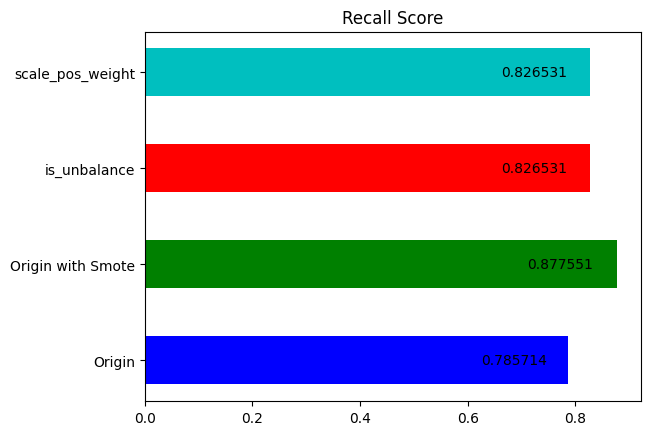

In [21]:
score_df = pd.DataFrame({'Recall':[recall_score(y_test, y_pred_lgbm), recall_score(y_test, y_pred_lgbm_sm),
                                   recall_score(y_test, y_pred_lgbmi), recall_score(y_test, y_pred_lgbms)],
                          'model' : ['Origin','Origin with Smote', 'is_unbalance', 'scale_pos_weight']})
re_vals = score_df.Recall
ind = np.arange(score_df.shape[0])
width = 0.5
colors = ['b', 'g', 'r', 'c']

def autolabel(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
                '%f' % float(width),
                ha='right', va='center')

# make the plots
fig, ax = plt.subplots()
a = ax.barh(ind, re_vals, width, color = colors) # plot a vals
ax.set_yticks(ind)  # position axis ticks
ax.set_yticklabels(score_df.model)  # set them to the names
autolabel(a)
plt.title("Recall Score")
plt.show()